In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datensätze

In [115]:
df_train = pd.read_csv("dataset/dengue_features_train.csv")
df_labels = pd.read_csv("dataset/dengue_labels_train.csv")

# Teilung in sj und iq
Die Datensätze werden anhand der Stadt (sj für San Juan und iq für Iquitos) aufgeteilt für eine einfachere Bearbeitung.
Aus diesem Grund wird auch der Label-Trainingsdatensatz wird aufgeteilt.

In [116]:
df_sj_train = df_train.loc[df_train['city']=='sj']
df_sj_labels = df_labels.loc[df_labels['city']=='sj']

df_iq_train = df_train.loc[df_train['city']=='iq']
df_iq_labels = df_labels.loc[df_labels['city']==('iq')]

# Beschreibung der Attribute

NDVI-Daten
Vegetation: 1 = grün, 0 = nicht grün, -1 = Wasser
* ndvi_ne
* ndvi_nw
* ndvi_se
* ndvi_sw

Reanalysierte Wetterdaten
* reanalysis_sat_precip_amt_mm 
    * Insgesamter Niederschlag
* reanalysis_dew_point_temp_k 
    * durchschnittliche Tautemperatur
* reanalysis_air_temp_k 
    * Durchschnittliche Lufttemperatur
* reanalysis_relative_humidity_percent
    * Durchschnittliche relative Feuchtigkeit
* reanalysis_specific_humidity_g_per_kg 
    * Durchschnittliche spezifische Feuchtigkeit
* reanalysis_precip_amt_kg_per_m2 
    * Insgesamter Niederschlag
* reanalysis_max_air_temp_k 
    * Maximale Lufttemperatur
* reanalysis_min_air_temp_k 
    * Minimale Lufttemperatur
* reanalysis_avg_temp_k 
    * Durchschnittliche Lufttemperatur
* reanalysis_tdtr_k 
    * Tägliche Temperaturspanne

Niederschlagsdaten vom Satellit
* precipitation_amt_mm 
    * Insgesamter Niederschlag

Tägliche Klimadaten
* station_max_temp_c
    * Maximale Temperatur
* station_min_temp_c 
    * Minimale Temperatur
* station_avg_temp_c
    * Durchschnittstemperatur
* station_precip_mm 
    * Insgesamter Niederschlag  
* station_diur_temp_rng_c 
    * Tägliche Temperaturspanne

# Visualisiere Daten
### Zeitreihendarstellung
Wie viele Krankheitsfälle gibt es im Laufe der Zeit?
Zur besser Ansicht werden die Einträge in 'week_start_date' von String in datetime-Objekte umgewandelt.

C:\Users\rener\AppData\Local\Temp\ipykernel_22432\3727925516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')
C:\Users\rener\AppData\Local\Temp\ipykernel_22432\3727925516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iq_train['week_start_date'] = pd.to_datetime(df_iq_train['week_start_date'], format='%Y-%m-%d')


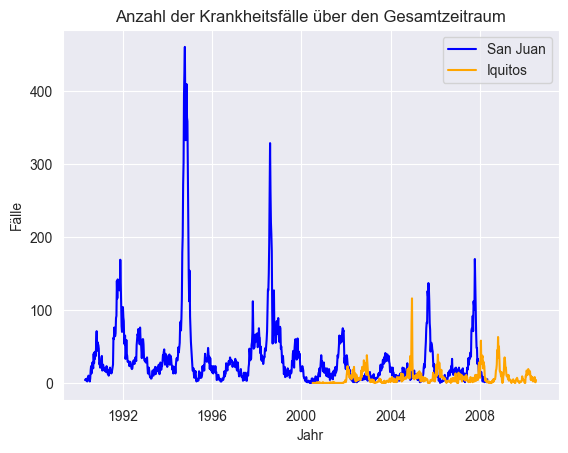

In [117]:
df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')
df_iq_train['week_start_date'] = pd.to_datetime(df_iq_train['week_start_date'], format='%Y-%m-%d')

plt.plot(df_sj_train['week_start_date'], df_sj_labels['total_cases'], label='San Juan', color='blue')
plt.plot(df_iq_train['week_start_date'], df_iq_labels['total_cases'], label='Iquitos', color='orange')

plt.title('Anzahl der Krankheitsfälle über den Gesamtzeitraum')
plt.xlabel('Jahr')
plt.ylabel('Fälle')
plt.legend()
plt.savefig('pictures/total_cases_im_gesamtzeitraum.png',bbox_inches="tight")
plt.show()

### Fehlende Werte
Hier werden fehlende Werte visualisiert.

Im sj-Datensatz sieht man zwei Daten, die, außer die NDVI-Attribute, null Werte besitzen. Sie sind mit dem Datum 1992-01-01 und 1998-01-01 gekennzeichnet.
Es gibt eine große Lücke an Werten der NDVI-Attribute von 1994-09-24 bis 1994-12-24
Im iq-Datensatz sind vier Daten, die viele null Werte besitzen, manchmal mit den NDVI-Attributen, manchmal ohne: 2004-01-01, 2005-01-01, 2009-01-01, 2010-01-01
Es gibt zwei große Lücken an Werten der Attribute 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c' von 2008-06-10 bis 2008-07-15

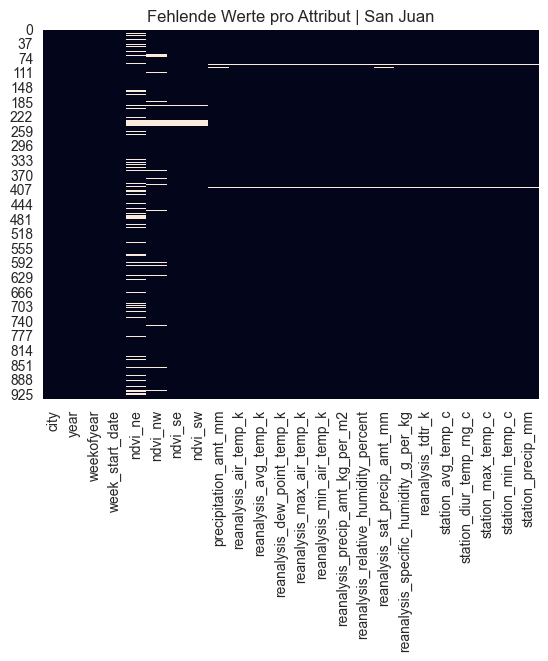

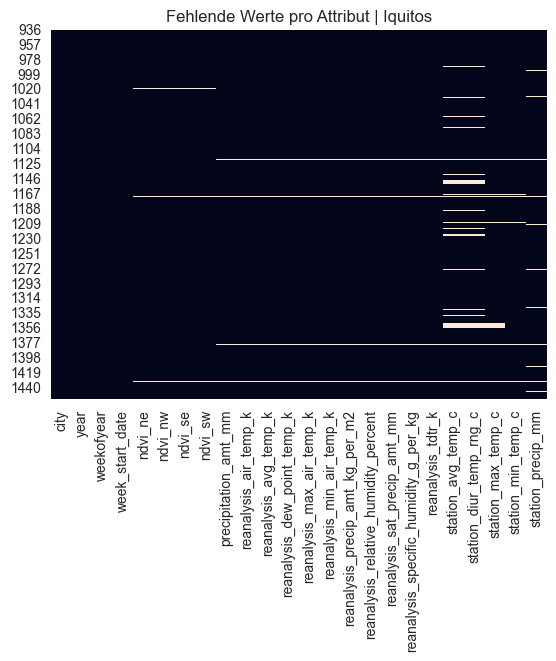

In [118]:
sns.heatmap(df_sj_train.isnull(), cbar=False).set(title='Fehlende Werte pro Attribut | San Juan')
plt.savefig('pictures/null_werte_pro_attribut_sj.png',bbox_inches="tight")
plt.show()
sns.heatmap(df_iq_train.isnull(), cbar=False).set(title='Fehlende Werte pro Attribut | Iquitos')
plt.savefig('pictures/null_werte_pro_attribut_iq.png',bbox_inches="tight")
plt.show()

Hier sieht man die Attribute, die am meisten mit null Werten belegt sind. 
Die NDVI-Attribute sind ganz oben, mit 'ndvi_ne' am lückenhaftesten.

C:\Users\rener\AppData\Local\Temp\ipykernel_22432\2660870699.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")


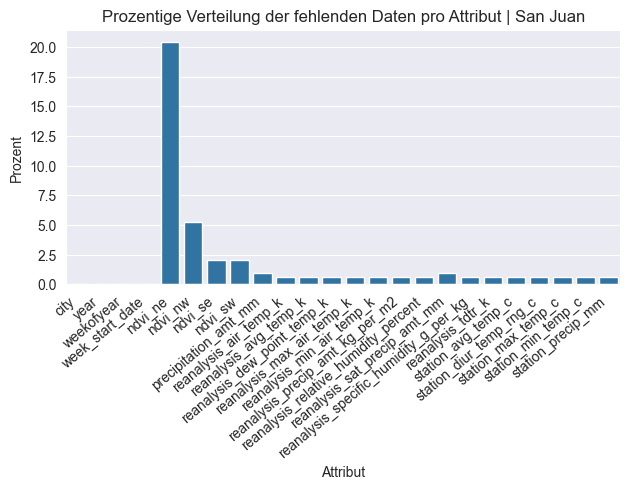

In [119]:
null_vals = df_sj_train.isnull().sum()
total_vals = len(df_sj_train)
null_percent = (null_vals / total_vals) * 100

df_null_percent = pd.DataFrame({'Attribut': null_vals.index, 'Prozent': null_percent.values})

barplot = sns.barplot(x='Attribut', y='Prozent', data=df_null_percent)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Prozentige Verteilung der fehlenden Daten pro Attribut | San Juan')
plt.savefig('pictures/prozentverteilung_null_werte_sj.png',bbox_inches="tight")
plt.show()

Hier sind die GHCN-Weather Station-Werte meistens null, mit 'station_avg_temp_c' und 'station_diur_temp_rng_c' am häufigsten

C:\Users\rener\AppData\Local\Temp\ipykernel_22432\1757630132.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")


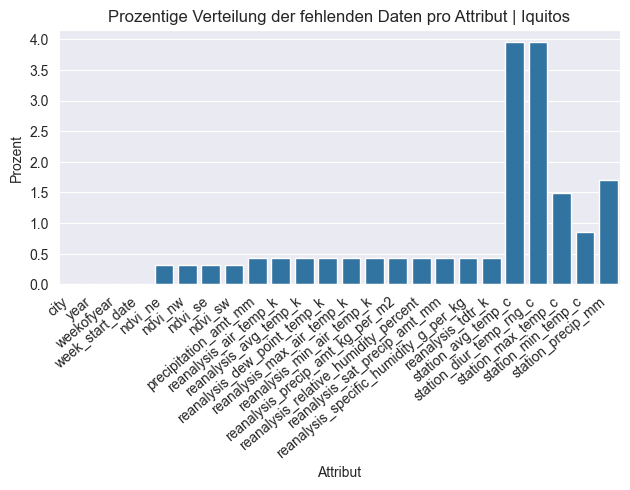

In [120]:
null_vals = df_iq_train.isnull().sum()
total_vals = len(df_sj_train)
null_percent = (null_vals / total_vals) * 100

df_null_percent = pd.DataFrame({'Attribut': null_vals.index, 'Prozent': null_percent.values})

barplot = sns.barplot(x='Attribut', y='Prozent', data=df_null_percent)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Prozentige Verteilung der fehlenden Daten pro Attribut | Iquitos')
plt.savefig('pictures/prozentverteilung_null_werte_iq.png',bbox_inches="tight")
plt.show()

## Wertebereichverteilung
In welchen Wertebereichen liegen die Werte der Attribute?

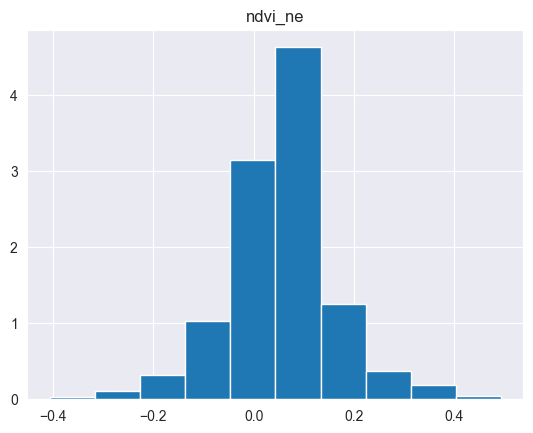

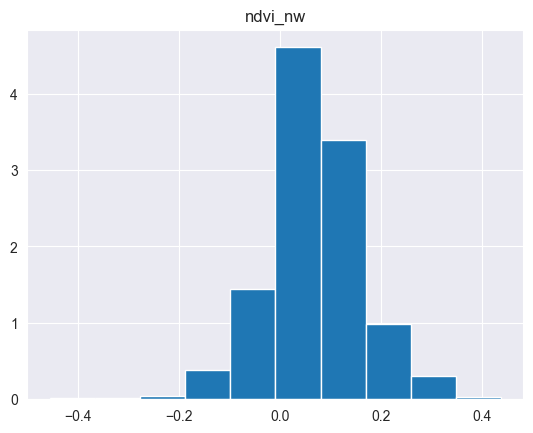

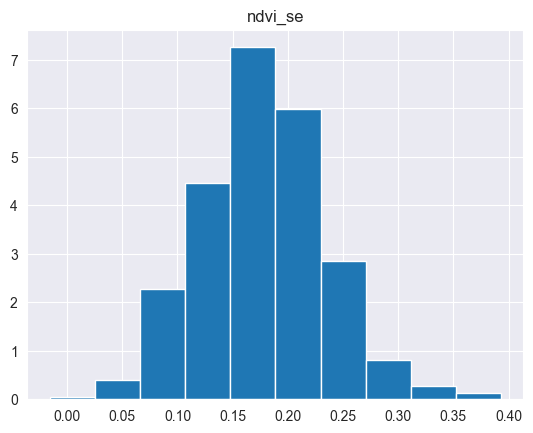

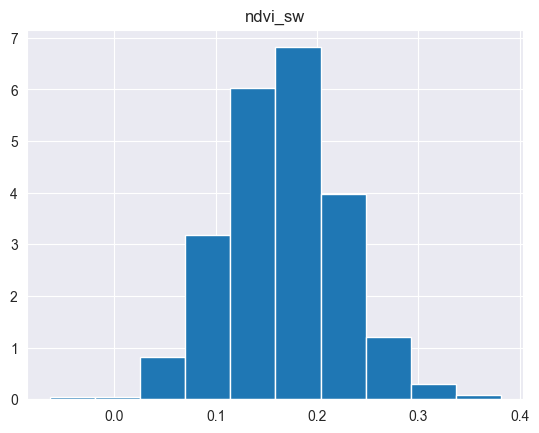

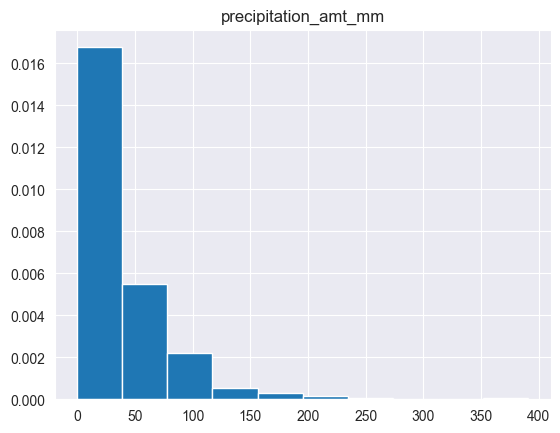

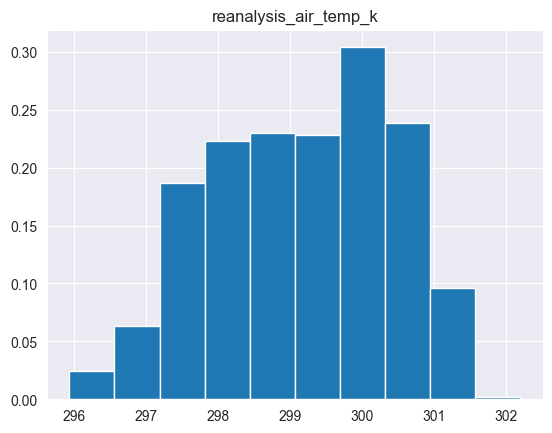

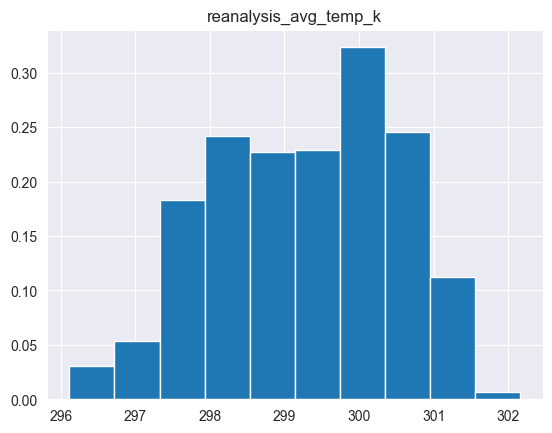

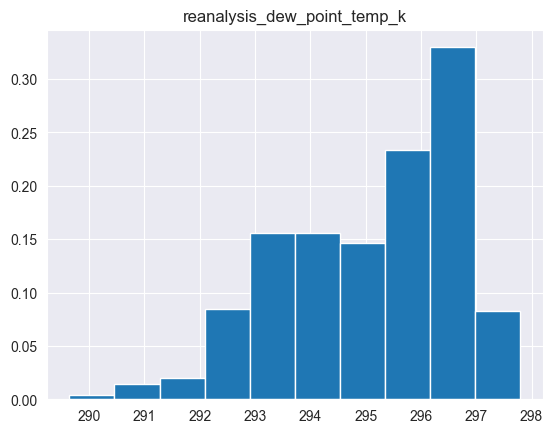

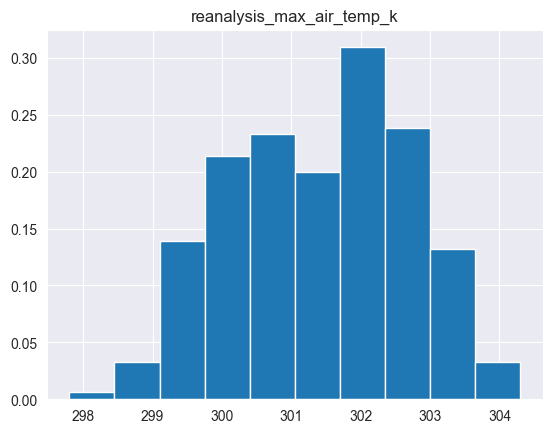

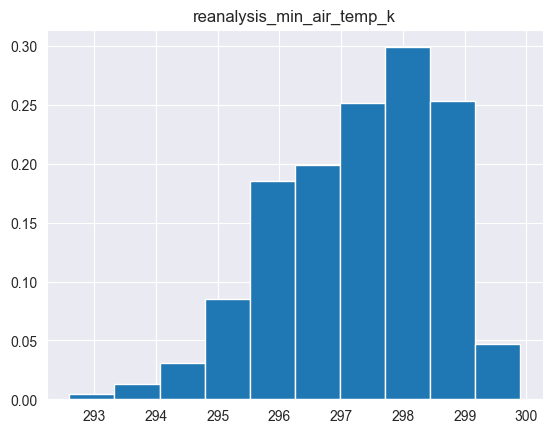

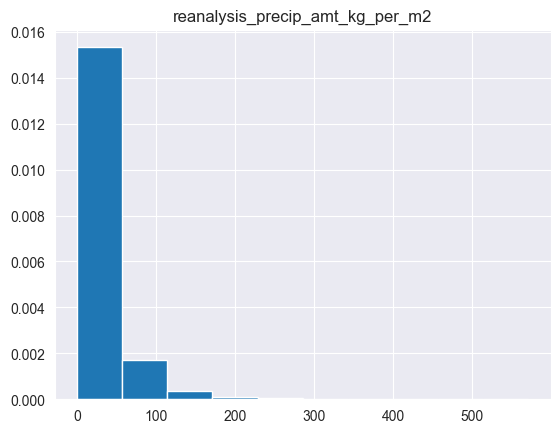

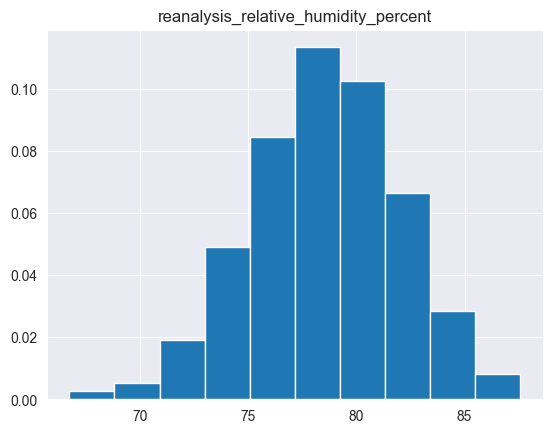

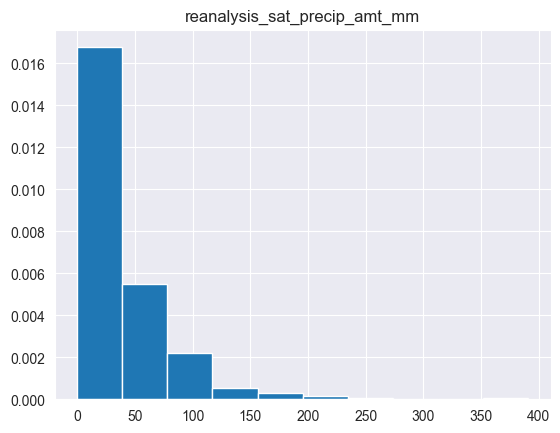

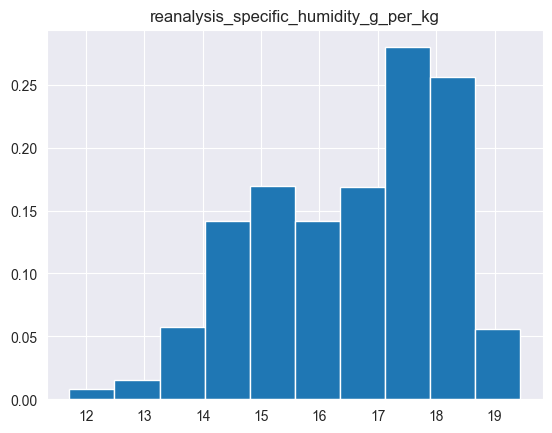

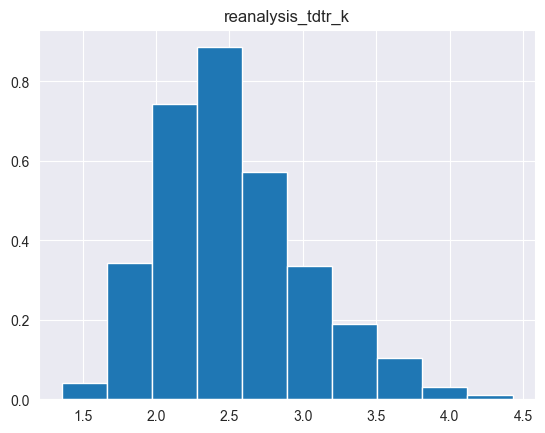

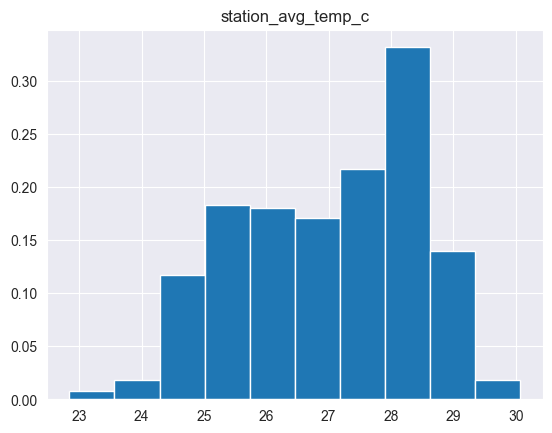

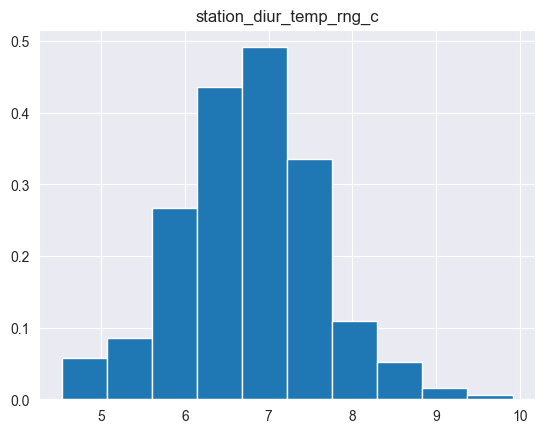

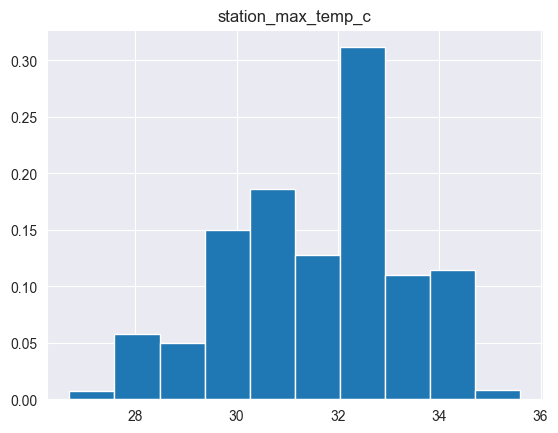

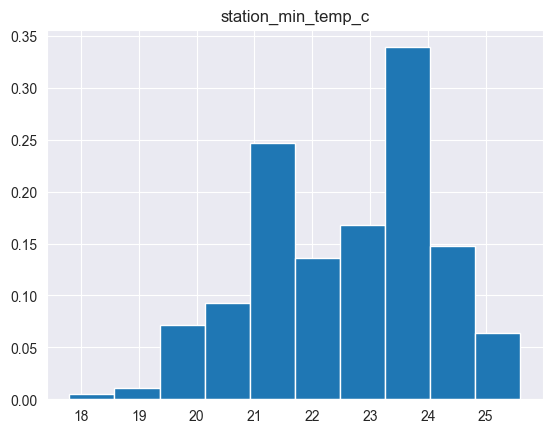

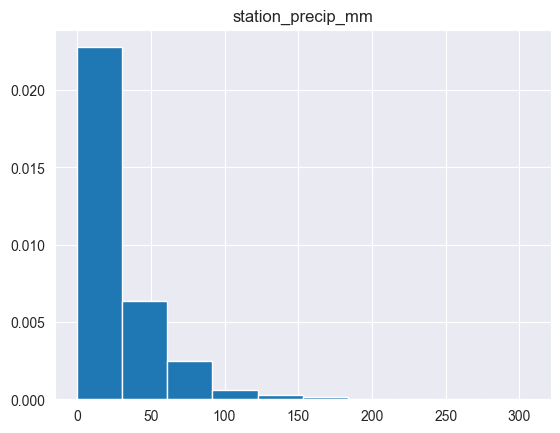

In [127]:
df_sj_num = df_sj_train.copy()
df_sj_num.drop(columns = ['city','year','weekofyear','week_start_date'], axis=1, inplace=True)
for col in df_sj_num: 
    plt.hist(df_sj_num[col], density=True)
    plt.title(col)
    plt.show()

### Ermitteln von korrelierenden Attributen
Welche Attribute korrelieren? Welche Attribute haben keine oder doppelte Aussagekraft und wie geht man mit ihnen um?

In [ ]:
#df_nulls_median = df_train.copy()
#df_nulls_median.fillna(df_nulls_median.mean())

In [ ]:
#pair_attributes = df_nulls_median[['city','reanalysis_avg_temp_k','station_avg_temp_c']].copy()
#sns.pairplot(data=pair_attributes,hue='city')
#plt.show()